#**Python AI**
**Part 3: Classification**

Section 19 - Kernel SVM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Take data

In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Step 2: Split data

In [3]:
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Step 3: Normalize features

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 4: Creat SVM model with kernel:

poly: polynomial

rbf: radial basis function (RBF)

sigmoid: sigmoid

precomputed: 
**Note Precomputed matrix must be a square matrix **

linear: linear

In [5]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)

SVC(random_state=0)

Step 5: Predict

In [6]:
y_pred = model.predict(X_test)

Step 6: Accuracy 

In [7]:
Accuracy = 0
count = 0
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    count += 1
 
Accuracy = count/len(y_pred)

print(Accuracy*100, '%')

95.0 %


Step 7: Plot model

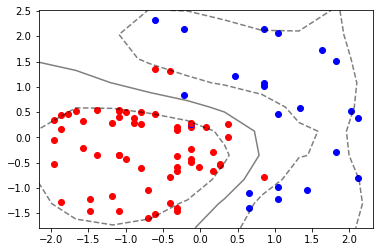

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


for i in range(len(y_test)):
  if y_test[i] == 0:
    plt.scatter(X_test[i,0],X_test[i,1],color='red')
  else:
    plt.scatter(X_test[i,0],X_test[i,1],color='blue')
    
plot_svc_decision_function(model)